In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [4]:
stock=pd.read_csv(r"E:\internship\NSE-TATAGLOBAL.csv")

In [5]:
stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
stock.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
stock.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
stock.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2035.0,1.497137e+02,4.866451e+01,81.10,120.025,141.50,157.175,327.70
High,2035.0,1.519928e+02,4.941311e+01,82.80,122.100,143.40,159.400,328.75
Low,2035.0,1.472939e+02,4.793196e+01,80.00,118.300,139.60,155.150,321.65
Last,2035.0,1.494743e+02,4.873257e+01,81.00,120.075,141.10,156.925,325.95
Close,2035.0,1.494503e+02,4.871204e+01,80.95,120.050,141.25,156.900,325.75
Total Trade Quantity,2035.0,2.335681e+06,2.091778e+06,39610.00,1146444.500,1783456.00,2813594.000,29191015.00
Turnover (Lacs),2035.0,3.899981e+03,4.570768e+03,37.04,1427.460,2512.03,4539.015,55755.08


In [10]:
stock.shape

(2035, 8)

In [11]:
stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [12]:
stock.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
2030    False
2031    False
2032    False
2033    False
2034    False
Length: 2035, dtype: bool

In [13]:
stock.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


<Axes: >

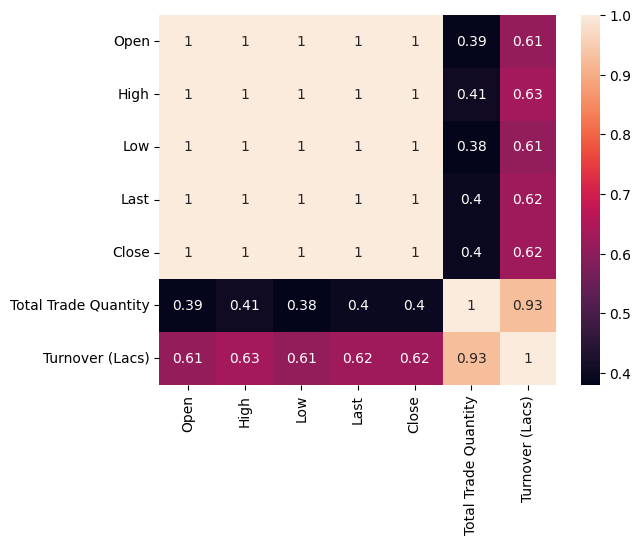

In [14]:
import seaborn as sns
sns.heatmap(stock.corr(), annot=True)

In [15]:
stock_high=stock.reset_index()['High'] # also chose close variable but i chose high variable for 30 days predection.

In [16]:
stock_high.shape

(2035,)

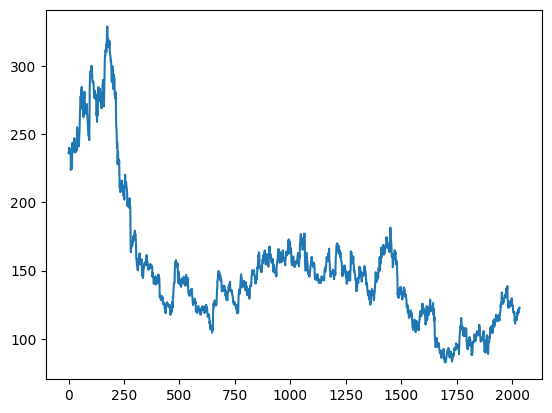

In [17]:
plt.plot(stock_high)

In [18]:
stock_high

0       235.95
1       236.80
2       240.00
3       236.75
4       239.20
         ...  
2030    119.50
2031    121.00
2032    121.95
2033    122.00
2034    123.00
Name: High, Length: 2035, dtype: float64

#### The MinMaxScaler is a data preprocessing technique commonly used when working with LSTM models. LSTM models are sensitive to the scale of the input data, and using the MinMaxScaler helps to normalize the data and bring it within a specific range, typically between 0 and 1.

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
stock_high = scaler.fit_transform(np.array(stock_high).reshape(-1,1))

In [20]:
print(stock_high)

[[0.62268754]
 [0.62614353]
 [0.6391543 ]
 ...
 [0.15917869]
 [0.15938199]
 [0.16344786]]


In [21]:
stock_high.shape

(2035, 1)

In [22]:
#Split the data into train and test split
training_size = int(len(stock_high) * 0.75)
test_size = len(stock_high) - training_size
train_data,test_data = stock_high[0:training_size,:], stock_high[training_size:len(stock_high),:1]

In [23]:
training_size, test_size

(1526, 509)

In [24]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [25]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [26]:
print(x_train)

[[0.62268754 0.62614353 0.6391543  ... 0.85464525 0.86013417 0.86765603]
 [0.62614353 0.6391543  0.62594023 ... 0.86013417 0.86765603 0.86480992]
 [0.6391543  0.62594023 0.63590161 ... 0.86765603 0.86480992 0.84854645]
 ...
 [0.3210002  0.32384631 0.3240496  ... 0.1955682  0.20227689 0.20105713]
 [0.32384631 0.3240496  0.3240496  ... 0.20227689 0.20105713 0.1955682 ]
 [0.3240496  0.3240496  0.32445619 ... 0.20105713 0.1955682  0.18906282]]


In [27]:
print(x_test.shape)
print(y_test.shape)

(408, 100)
(408,)


In [28]:
print(x_train.shape)
print(y_train.shape)

(1425, 100)
(1425,)


In [29]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [30]:
print(x_train.shape), print(y_train.shape)


(1425, 100, 1)
(1425,)


(None, None)

In [31]:
print(x_test.shape), print(y_test.shape)

(408, 100, 1)
(408,)


(None, None)

### Create the Stacked LSTM model

In [32]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


#### Increasing the number of epochs allows the model to potentially learn more from the data but can also increase the risk of overfitting if not properly controlled

In [34]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 12s 238ms/step - loss: 0.0239 - val_loss: 0.0112
Epoch 2/100
23/23 [==============================] - 5s 202ms/step - loss: 0.0030 - val_loss: 8.2178e-04
Epoch 3/100
23/23 [==============================] - 4s 185ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 4/100
23/23 [==============================] - 5s 213ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/100
23/23 [==============================] - 6s 275ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 6/100
23/23 [==============================] - 6s 242ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 7/100
23/23 [==============================] - 5s 214ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/100
23/23 [==============================] - 4s 195ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/100
23/23 [==============================] - 4s 195ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/100
23/23 [==============================] - 4s 196ms/step - loss: 0.0012 - v

In [35]:
#predictions
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [36]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [37]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

167.48252693948547

In [38]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

108.36121127440018

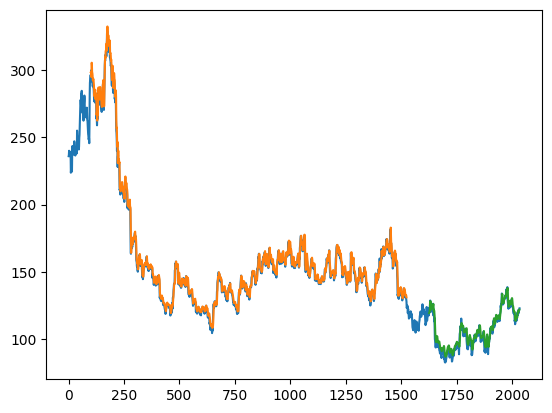

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [39]:
#Plotting
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(stock_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(stock_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(stock_high) - 1, :] = test_predict
#Plot baseline and predictions
plt.plot(scaler.inverse_transform(stock_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

In [40]:
#Predict the next 30 days Stock Price
len(test_data), x_test.shape

(509, (408, 100, 1))

In [41]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [42]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

[0.16482727]
101
1 day input [0.13254727 0.13397032 0.13356373 0.13498679 0.14108559 0.13498679
 0.12644847 0.12685505 0.12482212 0.14515145 0.1467778  0.15003049
 0.15368977 0.17198618 0.16548079 0.17625534 0.17564546 0.19129904
 0.20817239 0.20309006 0.18479366 0.17930474 0.1896727  0.17483228
 0.17849156 0.17645863 0.18540354 0.18377719 0.19190892 0.18987599
 0.19028258 0.19394186 0.20004066 0.19638138 0.19495832 0.20349665
 0.19597479 0.21162838 0.22036999 0.20979874 0.21528766 0.21589754
 0.21610083 0.22748526 0.19150234 0.1833706  0.17340923 0.16751372
 0.1622281  0.17056312 0.17462899 0.17930474 0.18174426 0.16853019
 0.16548079 0.1742224  0.1713763  0.17300264 0.17157959 0.17767839
 0.18459036 0.18702988 0.18987599 0.19109575 0.18581012 0.17015654
 0.16751372 0.16974995 0.16609067 0.15531612 0.15003049 0.15064037
 0.14860744 0.14596463 0.15043708 0.14413499 0.12441553 0.12827811
 0.11547062 0.12034966 0.13478349 0.13498679 0.12868469 0.13295385
 0.12807481 0.12624517 0.13051433

In [43]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [44]:
day_new.shape

(100,)

In [45]:
day_pred.shape

(30,)

In [46]:
len(stock_high)

2035

#### i take 1935 as i told taking previous 100 days data

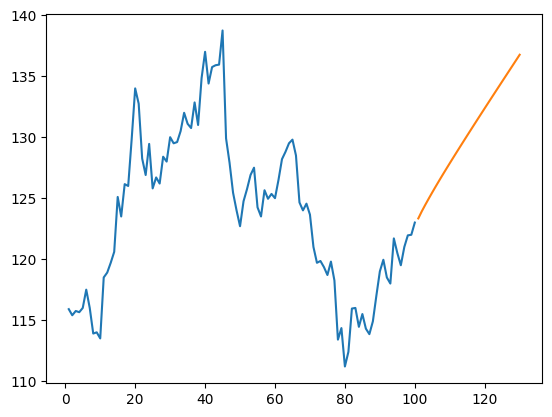

In [47]:
plt.plot(day_new, scaler.inverse_transform(stock_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

### orange line shows the predection of next 30 days.

# End

## thanks for watching